In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/PPG/Projekt/BIOGRID-ALL-4.4.243.tab3.txt', sep='\t', dtype={1: str, 2: str, 18: str})

In [5]:
df.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,Q59H94,NP_001120959|NP_001449,-,-,-,-,-,-,Homo sapiens,Homo sapiens
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,Q59FD9|F6THM6,NP_001094|NP_001265272|NP_001265273,-,-,-,-,-,-,Homo sapiens,Homo sapiens
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,-,NP_002018,-,-,-,-,-,-,Homo sapiens,Homo sapiens
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,-,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,-,-,-,-,-,-,Homo sapiens,Homo sapiens
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,-,NP_644805|NP_003141|NP_001356447|NP_001356443|...,-,-,-,-,-,-,Homo sapiens,Homo sapiens


In [6]:
unique_species = df['Organism Name Interactor A'].unique()
print(unique_species)

['Homo sapiens' 'Drosophila melanogaster' 'Caenorhabditis elegans'
 'Saccharomyces cerevisiae (S288c)' 'Schizosaccharomyces pombe (972h)'
 'Mus musculus' 'Rattus norvegicus' 'Canis familiaris'
 'Arabidopsis thaliana (Columbia)' 'Bos taurus' 'Gallus gallus'
 'Xenopus laevis' 'Bacillus subtilis (168)' 'Danio rerio'
 'Escherichia coli (K12/MG1655)' 'Human Herpesvirus 1'
 'Human Immunodeficiency Virus 1' 'Human Herpesvirus 4'
 'Hepatitus C Virus' 'Chlamydomonas reinhardtii' 'Zea mays'
 'Candida albicans (SC5314)' 'Plasmodium falciparum (3D7)'
 'Oryctolagus cuniculus' 'Human Herpesvirus 8' 'Human Herpesvirus 2'
 'Sus scrofa' 'Dictyostelium discoideum (AX4)' 'Human Herpesvirus 5'
 'Human Immunodeficiency Virus 2' 'Pan troglodytes'
 'Oryza sativa (Japonica)' 'Ustilago maydis (521)'
 'Emericella nidulans (FGSC A4)' 'Simian Immunodeficiency Virus'
 'Human Herpesvirus 6A' 'Cavia porcellus' 'Macaca mulatta'
 'Human Herpesvirus 6B' 'Human Herpesvirus 3' 'Cricetulus griseus'
 'Ricinus communis' 'Ne

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752018 entries, 0 to 2752017
Data columns (total 37 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   #BioGRID Interaction ID             int64 
 1   Entrez Gene Interactor A            object
 2   Entrez Gene Interactor B            object
 3   BioGRID ID Interactor A             int64 
 4   BioGRID ID Interactor B             int64 
 5   Systematic Name Interactor A        object
 6   Systematic Name Interactor B        object
 7   Official Symbol Interactor A        object
 8   Official Symbol Interactor B        object
 9   Synonyms Interactor A               object
 10  Synonyms Interactor B               object
 11  Experimental System                 object
 12  Experimental System Type            object
 13  Author                              object
 14  Publication Source                  object
 15  Organism ID Interactor A            int64 
 16  Organism ID Intera

In [8]:
df.shape

(2752018, 37)

In [9]:
columns_to_remove = ['Ontology Term IDs', 'Ontology Term Names', 'Ontology Term Categories', 'Ontology Term Qualifier IDs', 'Ontology Term Qualifier Names', 'Ontology Term Types']
df = df.drop(columns=columns_to_remove)

df = df.dropna()

df.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Tags,Source Database,SWISS-PROT Accessions Interactor A,TREMBL Accessions Interactor A,REFSEQ Accessions Interactor A,SWISS-PROT Accessions Interactor B,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Organism Name Interactor A,Organism Name Interactor B
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,-,BIOGRID,P45985,-,NP_003001|NP_001268364,Q14315,Q59H94,NP_001120959|NP_001449,Homo sapiens,Homo sapiens
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,-,BIOGRID,Q86TC9,A0A087WX60,NP_001243197|NP_001243196|NP_115967,P35609,Q59FD9|F6THM6,NP_001094|NP_001265272|NP_001265273,Homo sapiens,Homo sapiens
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,-,BIOGRID,Q04771,D3DPA4,NP_001104537|NP_001096,P49354,-,NP_002018,Homo sapiens,Homo sapiens
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,-,BIOGRID,P23769,-,NP_001139134|NP_116027|NP_001139133,P29590,-,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,Homo sapiens,Homo sapiens
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,-,BIOGRID,P15927,B4DUL2,NP_001342057|NP_002937|NP_001284487|NP_0013420...,P40763,-,NP_644805|NP_003141|NP_001356447|NP_001356443|...,Homo sapiens,Homo sapiens


In [10]:
filtered_df = df[(df['Organism Name Interactor A'].str.contains('Human Immunodeficiency Virus 1')) | (df['Organism Name Interactor B'].str.contains('Human Immunodeficiency Virus 1'))]

In [11]:
filtered_df.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Tags,Source Database,SWISS-PROT Accessions Interactor A,TREMBL Accessions Interactor A,REFSEQ Accessions Interactor A,SWISS-PROT Accessions Interactor B,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Organism Name Interactor A,Organism Name Interactor B
325819,470901,155807,10992,1205540,116188,HIV1gp4,-,vpr,SF3B2,-,...,-,BIOGRID,-,-,NP_057852,Q13435,-,NP_006833,Human Immunodeficiency Virus 1,Homo sapiens
325820,470902,155807,10992,1205540,116188,HIV1gp4,-,vpr,SF3B2,-,...,-,BIOGRID,-,-,NP_057852,Q13435,-,NP_006833,Human Immunodeficiency Virus 1,Homo sapiens
325821,470903,155807,10992,1205540,116188,HIV1gp4,-,vpr,SF3B2,-,...,-,BIOGRID,-,-,NP_057852,Q13435,-,NP_006833,Human Immunodeficiency Virus 1,Homo sapiens
325822,470905,10992,155807,116188,1205540,-,HIV1gp4,SF3B2,vpr,Cus1|SAP145|SF3B145|SF3b1|SF3b150,...,-,BIOGRID,Q13435,-,NP_006833,-,-,NP_057852,Homo sapiens,Human Immunodeficiency Virus 1
325890,470985,155871,904,1205541,107343,HIV1gp5,-,tat,CCNT1,-,...,-,BIOGRID,P04608,-,NP_057853,O60563,A8K4M5,NP_001264771|NP_001231,Human Immunodeficiency Virus 1,Homo sapiens


In [12]:
filtered_df.shape

(2555, 31)

In [13]:
protein_interactions = filtered_df.groupby('Official Symbol Interactor A')['Official Symbol Interactor B'].count()
print(protein_interactions)

Official Symbol Interactor A
ABCE1       2
ACOT8       1
AGO2        2
AMBRA1      2
AMOT        1
         ... 
srk1        1
tat       403
vif       226
vpr       583
vpu        80
Name: Official Symbol Interactor B, Length: 199, dtype: int64


In [14]:
experimental_systems = filtered_df['Experimental System'].value_counts()
print(experimental_systems)

Experimental System
Reconstituted Complex            629
Affinity Capture-Western         582
Affinity Capture-MS              518
Proximity Label-MS               485
Two-hybrid                       101
Protein-peptide                   48
Biochemical Activity              47
Co-crystal Structure              30
Co-localization                   27
Co-fractionation                  23
FRET                              20
Co-purification                   20
PCA                                8
Protein-RNA                        6
Affinity Capture-RNA               5
Far Western                        4
Phenotypic Suppression             1
Affinity Capture-Luminescence      1
Name: count, dtype: int64


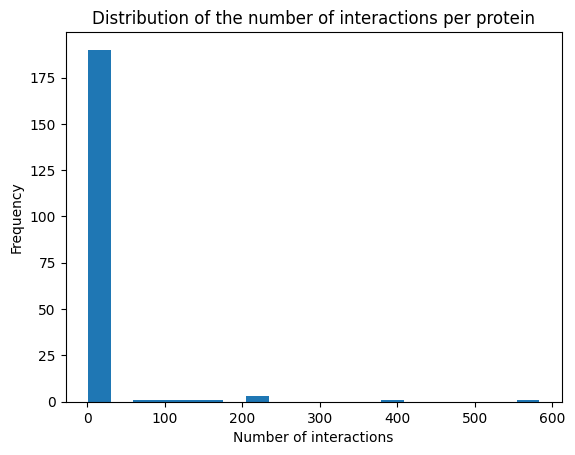

In [15]:
import matplotlib.pyplot as plt

plt.hist(protein_interactions, bins=20)
plt.xlabel('Number of interactions')
plt.ylabel('Frequency')
plt.title('Distribution of the number of interactions per protein')
plt.show()

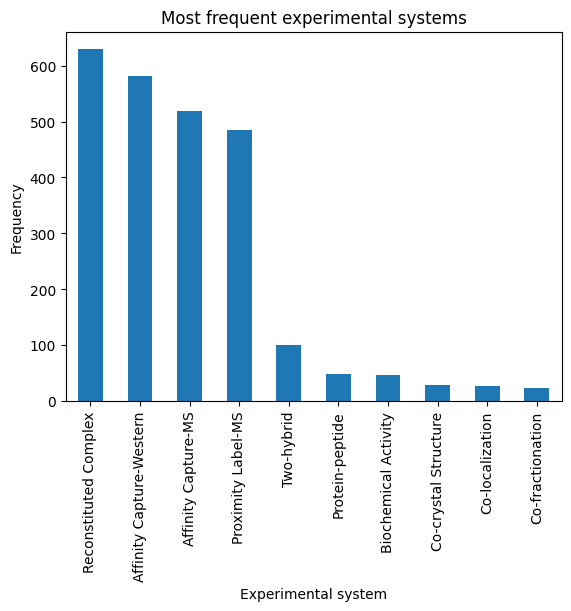

In [16]:
experimental_systems[:10].plot(kind='bar')
plt.xlabel('Experimental system')
plt.ylabel('Frequency')
plt.title('Most frequent experimental systems')
plt.show()

In [17]:
import networkx as nx

hiv_human_interactions = filtered_df[
    (
        (filtered_df['Organism Name Interactor A'] == 'Human Immunodeficiency Virus 1') &
        (filtered_df['Organism Name Interactor B'] == 'Homo sapiens')
    ) | (
        (filtered_df['Organism Name Interactor A'] == 'Homo sapiens') &
        (filtered_df['Organism Name Interactor B'] == 'Human Immunodeficiency Virus 1')
    )
]

if hiv_human_interactions.empty:
    print("Error: The dataframe for HIV-Human interactions is empty. Cannot create graph.")
else:
    graph = nx.from_pandas_edgelist(
        hiv_human_interactions,
        'Official Symbol Interactor A',
        'Official Symbol Interactor B',
        create_using=nx.Graph()
    )

centrality_measures = {
    "Node": list(graph.nodes()),
    "Degree": list(dict(graph.degree()).values()),
    "Degree Centrality": list(nx.degree_centrality(graph).values()),
    "Betweenness Centrality": list(nx.betweenness_centrality(graph).values()),
    "Closeness Centrality": list(nx.closeness_centrality(graph).values())
}

try:
    centrality_measures["Eigenvector Centrality"] = list(nx.eigenvector_centrality(graph, max_iter=500, tol=1e-4).values())
except nx.NetworkXError as e:
    print(f"Warning: Could not calculate Eigenvector centrality: {e}")

df_centrality = pd.DataFrame(centrality_measures)

df_centrality.head(10)

,Node,Degree,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
0,vpr,473,0.331001,0.494448,0.428872,0.650700
1,SF3B2,1,0.000700,0.000000,0.300210,0.028815
2,tat,334,0.233730,0.348567,0.395845,0.232084
3,CCNT1,2,0.001400,0.002129,0.341213,0.039093
4,SMARCA4,1,0.000700,0.000000,0.283644,0.010278
5,SMARCB1,2,0.001400,0.002544,0.297584,0.011622
6,WDR5,1,0.000700,0.000000,0.283644,0.010278
7,SUPT16H,2,0.001400,0.001075,0.305865,0.016157
8,ACTL6A,1,0.000700,0.000000,0.283644,0.010278
9,SMARCA5,2,0.001400,0.002129,0.341213,0.039093


In [18]:
graph.remove_nodes_from(list(nx.isolates(graph)))

In [19]:
graph.number_of_nodes()

1430

In [20]:
bridges = list(nx.bridges(graph))
df_bridges = pd.DataFrame(bridges, columns=['Node 1', 'Node 2'])
display(df_bridges)

,Node 1,Node 2
0,vpr,SF3B2
1,vpr,TP53BP1
2,vpr,RPA2
3,vpr,UBD
4,vpr,UNG
...,...,...
1179,rev,LIG3
1180,rev,HIST1H4A
1181,rev,CSNK2A1
1182,rev,FEM1C


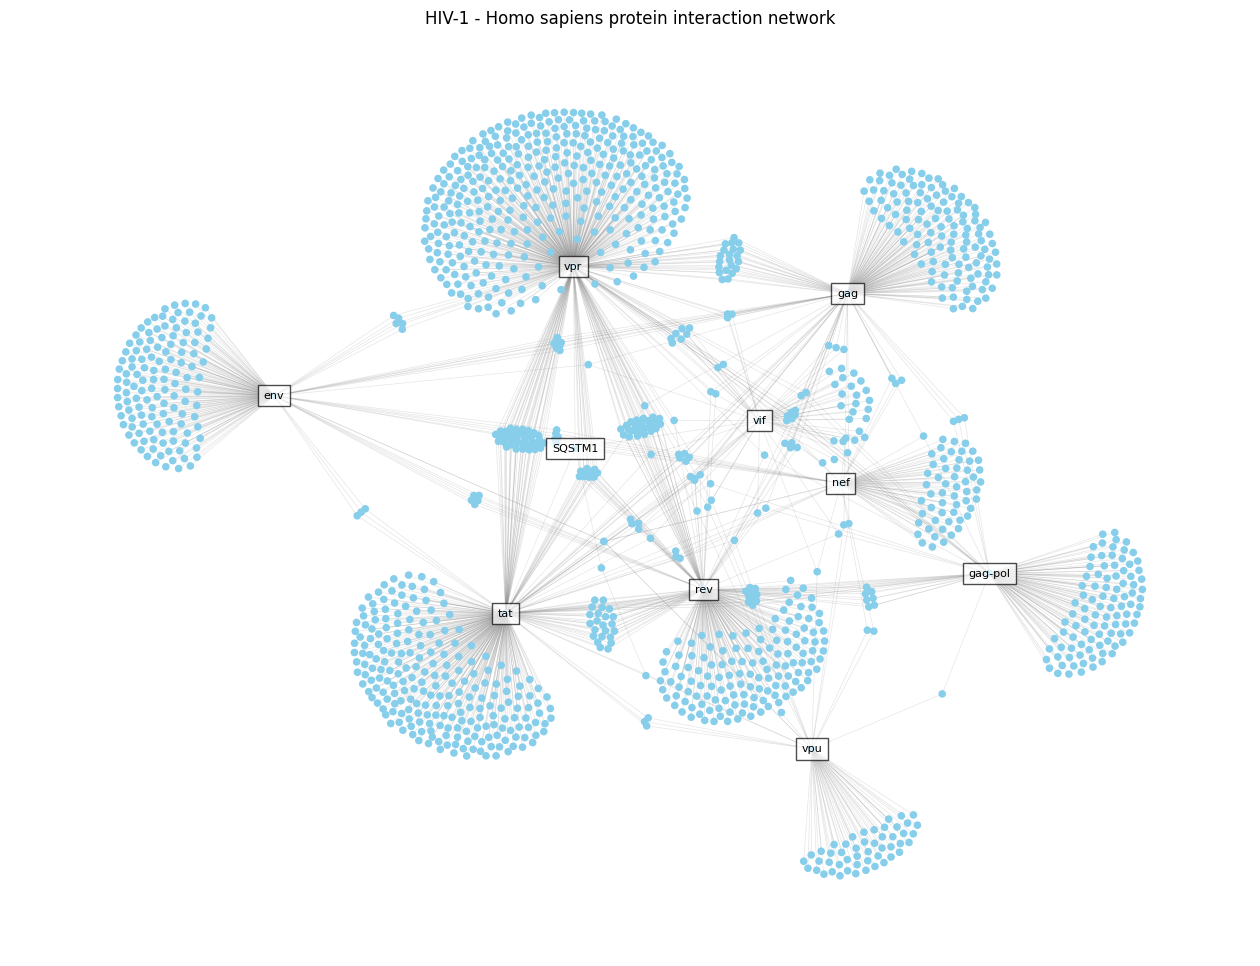

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

pos = nx.spring_layout(graph, k=0.05, iterations=200, seed=42)

node_sizes = [20 for _ in graph.nodes()]

edge_alpha = 0.2
edge_color = 'gray'
line_width = 0.5

centrality = nx.degree_centrality(graph)
top_n = 10
sorted_centrality = sorted(centrality.items(), key=lambda item: item[1], reverse=True)
top_nodes = [node for node, score in sorted_centrality[:top_n]]
labels = {node: node if node in top_nodes else '' for node in graph.nodes()}
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}

plt.figure(figsize=(16, 12))

nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(graph, pos, alpha=edge_alpha, edge_color=edge_color, width=line_width)
nx.draw_networkx_labels(graph, pos, labels=labels, font_size=8, bbox=label_options)

plt.title("HIV-1 - Homo sapiens protein interaction network")
plt.axis('off')
plt.show()

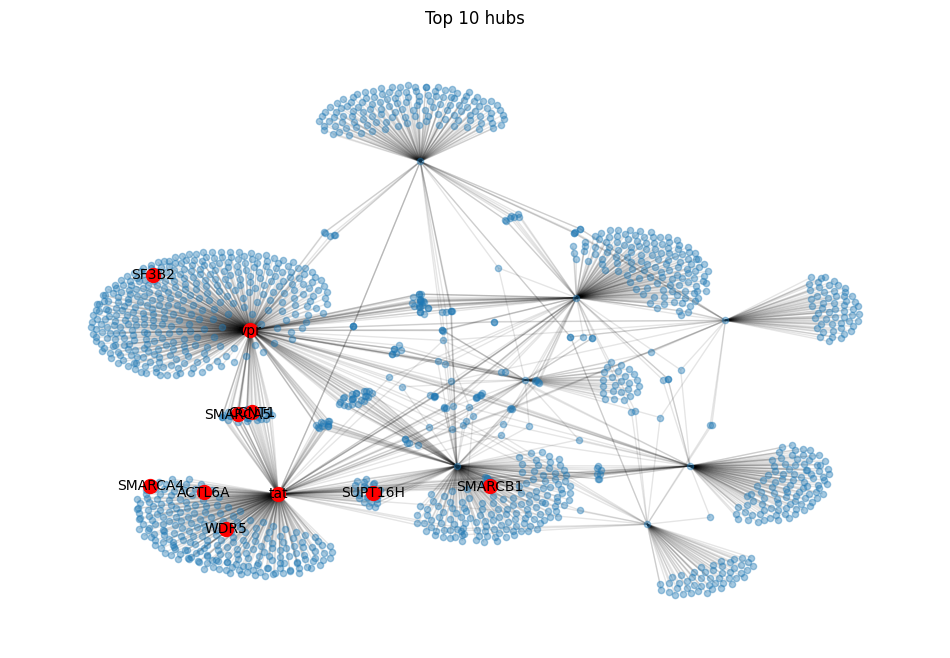

In [22]:
top_hubs = df_centrality.head(10)["Node"].values

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph, seed=42)
nx.draw_networkx_nodes(graph, pos, node_size=20, alpha=0.4)
nx.draw_networkx_nodes(graph, pos, nodelist=top_hubs, node_color='red', node_size=100)
nx.draw_networkx_labels(graph, pos, labels={node: node for node in top_hubs}, font_size=10)
nx.draw_networkx_edges(graph, pos, alpha=0.1)
plt.title("Top 10 hubs")
plt.axis("off")
plt.show()

In [28]:
hiv_proteins_set = get_hiv_proteins(hiv_human_interactions)
print(f"Detected {len(hiv_proteins_set)} HIV proteins.")

communities = detect_communities(graph)
print(f"Detected {len(communities)} communities.")

pos = nx.spring_layout(graph, k=0.3, iterations=100, seed=42)

all_human_nodes = [n for n in graph.nodes() if n.lower() not in hiv_proteins_set]

for comm_id, nodes in communities.items():
    subgraph = graph.subgraph(nodes)

    hiv_nodes = [n for n in nodes if n.lower() in hiv_proteins_set]
    human_nodes = [n for n in nodes if n.lower() not in hiv_proteins_set]

    print(f"\n=== COMMUNITY {comm_id} ===")
    print(f"Total nodes: {len(nodes)}, HIV proteins: {len(hiv_nodes)}, Human proteins: {len(human_nodes)}")

    create_community_plot(comm_id, nodes, hiv_nodes, human_nodes, pos, subgraph)

    try:
        enrich = gp.profile(
            organism='hsapiens',
            query=human_nodes,
            sources=['GO:BP', 'GO:MF', 'GO:CC', 'REAC', 'KEGG', 'WP', 'HP']
        )
    except Exception as e:
        print(f"gProfiler error: {e}")
        enrich = pd.DataFrame()

    if not enrich.empty:
        enrich = enrich[['name', 'native', 'source', 'p_value']]

        grouped = enrich.groupby('source')

        source_names = {
            'GO:BP': 'Biological Processes',
            'GO:MF': 'Molecular Functions',
            'GO:CC': 'Cellular Components',
            'REAC': 'Reactome Pathways',
            'KEGG': 'KEGG Pathways',
            'WP': 'WikiPathways',
            'HP': 'Human Phenotype Ontology'
        }

        for source_code, group in grouped:
            readable_name = source_names.get(source_code, source_code)
            group = group.sort_values(by='p_value')

            print(f"\n🔵 {readable_name} (Top terms):")
            for idx, row in group.head(10).iterrows():
                print(f"• {row['name']} ({row['native']}) - p={row['p_value']:.2e}")
    else:
        print("\n- No significant enrichment found.")

Detected 10 HIV proteins.
Detected 9 communities.

=== COMMUNITY 0 ===
Total nodes: 349, HIV proteins: 1, Human proteins: 348



🔵 Biological Processes (Top terms):
• DNA metabolic process (GO:0006259) - p=2.26e-13
• nucleobase-containing compound metabolic process (GO:0006139) - p=2.99e-13
• nucleic acid metabolic process (GO:0090304) - p=3.79e-13
• primary metabolic process (GO:0044238) - p=2.14e-12
• ribosome biogenesis (GO:0042254) - p=1.26e-11
• chromosome organization (GO:0051276) - p=9.95e-11
• rRNA processing (GO:0006364) - p=1.11e-10
• rRNA metabolic process (GO:0016072) - p=4.57e-10
• cell cycle (GO:0007049) - p=7.06e-10
• cell cycle process (GO:0022402) - p=2.13e-09

🔵 Cellular Components (Top terms):
• nucleoplasm (GO:0005654) - p=8.12e-54
• membrane-enclosed lumen (GO:0031974) - p=1.50e-45
• organelle lumen (GO:0043233) - p=1.50e-45
• intracellular organelle lumen (GO:0070013) - p=1.50e-45
• nuclear lumen (GO:0031981) - p=2.48e-45
• nucleus (GO:0005634) - p=5.96e-34
• intracellular organelle (GO:0043229) - p=2.68e-28
• intracellular membrane-bounded organelle (GO:0043231) - p=1.26e-26
• intracellul


🔵 Biological Processes (Top terms):
• chromatin remodeling (GO:0006338) - p=5.44e-45
• chromatin organization (GO:0006325) - p=4.97e-44
• DNA-templated transcription (GO:0006351) - p=2.99e-43
• regulation of nucleobase-containing compound metabolic process (GO:0019219) - p=1.42e-39
• transcription by RNA polymerase II (GO:0006366) - p=9.03e-36
• regulation of RNA metabolic process (GO:0051252) - p=8.61e-35
• regulation of RNA biosynthetic process (GO:2001141) - p=1.51e-33
• regulation of DNA-templated transcription (GO:0006355) - p=2.68e-32
• positive regulation of nucleobase-containing compound metabolic process (GO:0045935) - p=1.41e-30
• nucleic acid metabolic process (GO:0090304) - p=1.45e-29

🔵 Cellular Components (Top terms):
• nucleoplasm (GO:0005654) - p=3.09e-97
• nuclear lumen (GO:0031981) - p=1.86e-87
• intracellular organelle lumen (GO:0070013) - p=6.60e-75
• organelle lumen (GO:0043233) - p=6.60e-75
• membrane-enclosed lumen (GO:0031974) - p=6.60e-75
• chromosome (GO:0005


🔵 Biological Processes (Top terms):
• formation of cytoplasmic translation initiation complex (GO:0001732) - p=8.81e-22
• cytoplasmic translational initiation (GO:0002183) - p=9.02e-15
• protein metabolic process (GO:0019538) - p=4.13e-11
• translational initiation (GO:0006413) - p=2.44e-10
• cytoplasmic translation (GO:0002181) - p=5.39e-09
• viral translational termination-reinitiation (GO:0075525) - p=6.77e-09
• cellular response to stress (GO:0033554) - p=1.97e-07
• viral translation (GO:0019081) - p=1.75e-06
• response to stress (GO:0006950) - p=1.12e-05
• DNA damage response (GO:0006974) - p=1.82e-05

🔵 Cellular Components (Top terms):
• eukaryotic translation initiation factor 3 complex (GO:0005852) - p=1.00e-22
• eukaryotic 48S preinitiation complex (GO:0033290) - p=3.39e-22
• eukaryotic 43S preinitiation complex (GO:0016282) - p=1.01e-21
• translation preinitiation complex (GO:0070993) - p=2.74e-21
• cytosol (GO:0005829) - p=8.71e-19
• eukaryotic translation initiation factor


🔵 Biological Processes (Top terms):
• RNA processing (GO:0006396) - p=1.40e-16
• mRNA metabolic process (GO:0016071) - p=2.26e-14
• cytoplasmic translation (GO:0002181) - p=7.80e-14
• translation (GO:0006412) - p=9.03e-14
• ribosome biogenesis (GO:0042254) - p=1.60e-13
• regulation of mRNA metabolic process (GO:1903311) - p=8.53e-12
• mRNA processing (GO:0006397) - p=2.58e-11
• RNA splicing (GO:0008380) - p=4.83e-11
• nucleobase-containing compound metabolic process (GO:0006139) - p=1.84e-10
• regulation of RNA splicing (GO:0043484) - p=3.62e-10

🔵 Cellular Components (Top terms):
• nucleoplasm (GO:0005654) - p=1.38e-42
• nuclear lumen (GO:0031981) - p=1.52e-37
• membrane-enclosed lumen (GO:0031974) - p=1.24e-34
• intracellular organelle lumen (GO:0070013) - p=1.24e-34
• organelle lumen (GO:0043233) - p=1.24e-34
• spliceosomal complex (GO:0005681) - p=3.55e-27
• nucleus (GO:0005634) - p=7.67e-27
• protein-containing complex (GO:0032991) - p=1.25e-22
• catalytic step 2 spliceosome (GO:


🔵 Biological Processes (Top terms):
• protein modification by small protein conjugation (GO:0032446) - p=1.18e-16
• protein ubiquitination (GO:0016567) - p=2.28e-16
• proteolysis involved in protein catabolic process (GO:0051603) - p=1.98e-15
• protein modification by small protein conjugation or removal (GO:0070647) - p=2.28e-15
• post-translational protein modification (GO:0043687) - p=7.45e-15
• catabolic process (GO:0009056) - p=1.86e-14
• modification-dependent protein catabolic process (GO:0019941) - p=2.32e-14
• modification-dependent macromolecule catabolic process (GO:0043632) - p=2.63e-14
• macromolecule modification (GO:0043412) - p=7.32e-14
• ubiquitin-dependent protein catabolic process (GO:0006511) - p=3.47e-13

🔵 Cellular Components (Top terms):
• cytosol (GO:0005829) - p=3.67e-14
• nucleoplasm (GO:0005654) - p=3.24e-13
• catalytic complex (GO:1902494) - p=3.16e-12
• nucleus (GO:0005634) - p=7.27e-12
• nuclear lumen (GO:0031981) - p=2.07e-09
• ubiquitin ligase complex (


🔵 Biological Processes (Top terms):
• protein maturation (GO:0051604) - p=6.06e-24
• protein folding (GO:0006457) - p=3.25e-21
• protein metabolic process (GO:0019538) - p=5.20e-13
• response to endoplasmic reticulum stress (GO:0034976) - p=7.83e-13
• response to stress (GO:0006950) - p=4.01e-11
• protein folding in endoplasmic reticulum (GO:0034975) - p=1.93e-10
• cellular localization (GO:0051641) - p=1.78e-09
• intracellular transport (GO:0046907) - p=5.60e-09
• transport (GO:0006810) - p=8.13e-09
• macromolecule localization (GO:0033036) - p=9.27e-09

🔵 Cellular Components (Top terms):
• endoplasmic reticulum (GO:0005783) - p=1.07e-36
• endomembrane system (GO:0012505) - p=1.09e-36
• organelle membrane (GO:0031090) - p=7.65e-26
• endoplasmic reticulum lumen (GO:0005788) - p=9.62e-26
• endoplasmic reticulum protein-containing complex (GO:0140534) - p=6.81e-24
• organelle subcompartment (GO:0031984) - p=1.67e-22
• endoplasmic reticulum membrane (GO:0005789) - p=1.85e-22
• endoplasmi


🔵 Biological Processes (Top terms):
• macromolecule localization (GO:0033036) - p=6.90e-05
• cellular localization (GO:0051641) - p=1.89e-04
• protein localization (GO:0008104) - p=3.45e-04
• cellular macromolecule localization (GO:0070727) - p=3.71e-04
• organelle organization (GO:0006996) - p=6.15e-04
• localization (GO:0051179) - p=2.06e-03
• macromolecule catabolic process (GO:0009057) - p=3.29e-03
• protein transport (GO:0015031) - p=6.73e-03
• ubiquitin-dependent protein catabolic process (GO:0006511) - p=7.92e-03
• modification-dependent protein catabolic process (GO:0019941) - p=9.17e-03

🔵 Cellular Components (Top terms):
• cytoplasm (GO:0005737) - p=1.05e-08
• organelle membrane (GO:0031090) - p=8.62e-08
• endomembrane system (GO:0012505) - p=3.14e-07
• bounding membrane of organelle (GO:0098588) - p=1.11e-04
• intracellular membrane-bounded organelle (GO:0043231) - p=3.19e-04
• perinuclear region of cytoplasm (GO:0048471) - p=7.59e-04
• organelle envelope (GO:0031967) - p=1


🔵 Biological Processes (Top terms):
• translation (GO:0006412) - p=1.27e-27
• cytoplasmic translation (GO:0002181) - p=1.20e-15
• regulation of translation (GO:0006417) - p=5.63e-14
• viral process (GO:0016032) - p=7.84e-14
• viral life cycle (GO:0019058) - p=2.32e-13
• protein metabolic process (GO:0019538) - p=9.89e-13
• translational initiation (GO:0006413) - p=6.48e-12
• regulation of translational initiation (GO:0006446) - p=2.72e-10
• regulation of protein metabolic process (GO:0051246) - p=1.49e-08
• regulation of viral life cycle (GO:1903900) - p=1.87e-08

🔵 Cellular Components (Top terms):
• cytosol (GO:0005829) - p=1.13e-26
• cytosolic ribosome (GO:0022626) - p=3.80e-16
• ribonucleoprotein granule (GO:0035770) - p=1.07e-15
• cytoplasmic ribonucleoprotein granule (GO:0036464) - p=4.60e-15
• cytoplasm (GO:0005737) - p=6.01e-13
• extracellular exosome (GO:0070062) - p=1.44e-12
• ribosomal subunit (GO:0044391) - p=1.90e-12
• extracellular vesicle (GO:1903561) - p=2.21e-12
• extr


🔵 Biological Processes (Top terms):
• transport (GO:0006810) - p=3.23e-08
• apoptotic process (GO:0006915) - p=8.82e-08
• localization (GO:0051179) - p=1.34e-07
• programmed cell death (GO:0012501) - p=1.76e-07
• cell death (GO:0008219) - p=1.85e-07
• ephrin receptor signaling pathway (GO:0048013) - p=4.19e-07
• negative regulation of inflammatory response to antigenic stimulus (GO:0002862) - p=4.96e-07
• Fc receptor signaling pathway (GO:0038093) - p=8.28e-07
• regulation of programmed cell death (GO:0043067) - p=9.88e-07
• Fc-gamma receptor signaling pathway (GO:0038094) - p=1.18e-06

🔵 Cellular Components (Top terms):
• vesicle (GO:0031982) - p=1.13e-11
• cytoplasm (GO:0005737) - p=1.11e-09
• extrinsic component of cytoplasmic side of plasma membrane (GO:0031234) - p=1.25e-08
• endomembrane system (GO:0012505) - p=2.56e-08
• cytoplasmic side of plasma membrane (GO:0009898) - p=2.95e-08
• vacuole (GO:0005773) - p=1.21e-07
• cell junction (GO:0030054) - p=1.33e-07
• cytoplasmic side 

In [ ]:
#filtered_df.to_csv('filtered_data.csv', index=False)

In [ ]:
import requests

#df = pd.read_csv('/content/filtered_data.csv')

#DGRAPH_ENDPOINT = "https://nameless-brook-700032.eu-central-1.aws.cloud.dgraph.io/graphql"
#DGRAPH_TOKEN = "ZTQ2MTIyNTlhNDMwOTRkZWU4NTIzMWViODllMDU0MmM="

headers = {
    "Content-Type": "application/json",
    "X-Auth-Token": DGRAPH_TOKEN
}

BATCH_SIZE = 100
all_mutations = []

for batch_start in range(0, len(df), BATCH_SIZE):
    batch_df = df.iloc[batch_start: batch_start + BATCH_SIZE]
    mutation_blocks = []

    for index, row in batch_df.iterrows():
        source_id = row['Official Symbol Interactor A']
        target_id = row['Official Symbol Interactor B']
        experimental = str(row.get('Experimental System Type', '')).replace('"', '\\"')
        publication = str(row.get('Source Database', '')).replace('"', '\\"')

        mutation = f"""
        addInteraction{index}: addInteraction(input: [{{
            source: {{ id: "{source_id}" }},
            target: {{ id: "{target_id}" }},
            experimentalSystemType: "{experimental}",
            publicationIdentifiers: "{publication}"
        }}]) {{
            interaction {{ experimentalSystemType }}
        }}"""
        mutation_blocks.append(mutation)

    mutation_string = "mutation {\n" + "\n".join(mutation_blocks) + "\n}"

    response = requests.post(DGRAPH_ENDPOINT, json={"query": mutation_string}, headers=headers)

    print(f"Batch {batch_start}-{batch_start+len(batch_df)} → Status:", response.status_code)
    if response.status_code != 200:
        print("Error:", response.text)


Batch 0-100 → Status: 200
Batch 100-200 → Status: 200
Batch 200-300 → Status: 200
Batch 300-400 → Status: 200
Batch 400-500 → Status: 200
Batch 500-600 → Status: 200
Batch 600-700 → Status: 200
Batch 700-800 → Status: 200
Batch 800-900 → Status: 200
Batch 900-1000 → Status: 200
Batch 1000-1100 → Status: 200
Batch 1100-1200 → Status: 200
Batch 1200-1300 → Status: 200
Batch 1300-1400 → Status: 200
Batch 1400-1500 → Status: 200
Batch 1500-1600 → Status: 200
Batch 1600-1700 → Status: 200
Batch 1700-1800 → Status: 200
Batch 1800-1900 → Status: 200
Batch 1900-2000 → Status: 200
Batch 2000-2100 → Status: 200
Batch 2100-2200 → Status: 200
Batch 2200-2300 → Status: 200
Batch 2300-2400 → Status: 200
Batch 2400-2500 → Status: 200
Batch 2500-2555 → Status: 200


In [ ]:
!pip install torch torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 832.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
import torch
from torch_geometric.data import Data
import numpy as np

nodes = df_centrality["Node"].values
node_to_idx = {node: idx for idx, node in enumerate(nodes)}

features = df_centrality.drop(columns=["Node"]).values
features = torch.tensor(features, dtype=torch.float)

labels = []
for node in df_centrality["Node"]:
    if node.lower() in hiv_proteins_set:
        labels.append(1)  # HIV protein
    else:
        labels.append(0)  # Human protein
labels = torch.tensor(labels, dtype=torch.long)

edges = []
for u, v in graph.edges():
    edges.append([node_to_idx[u], node_to_idx[v]])

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

data = Data(x=features, edge_index=edge_index, y=labels)

print(data)

Data(x=[1430, 5], edge_index=[2, 1708], y=[1430])


In [ ]:
def train(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

def evaluate(model, data):
    model.eval()
    with torch.no_grad():
        logits = model(data)
        pred = logits.argmax(dim=1)
        acc = (pred == data.y).sum().item() / data.y.size(0)
    return acc

Graph Data Object:
Data(x=[1430, 5], edge_index=[2, 1708], y=[1430])

Using device: cpu

🔎 Training GCN with hidden_dim = 16
Epoch: 010, Loss: 1.7945, Accuracy: 0.9930
Early stopping at epoch 11
Best Accuracy for hidden_dim=16: 0.9930


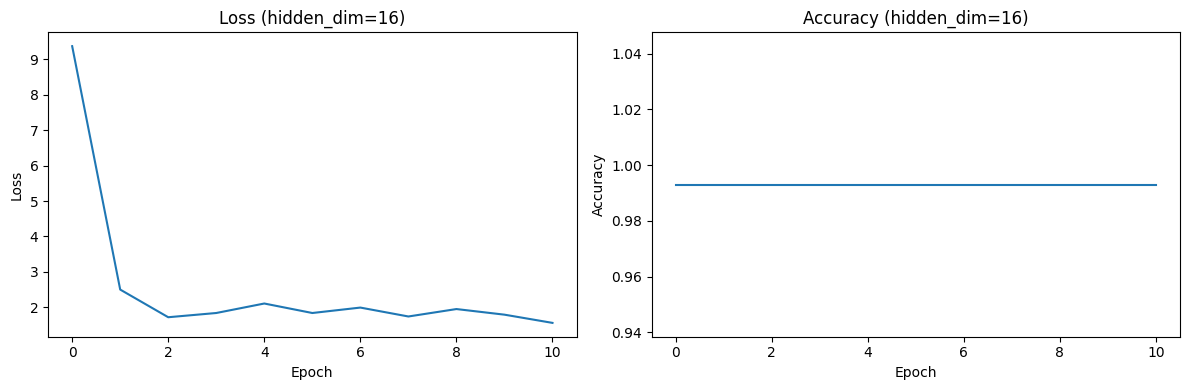


🔎 Training GCN with hidden_dim = 32
Epoch: 010, Loss: 1.3496, Accuracy: 0.9930
Early stopping at epoch 11
Best Accuracy for hidden_dim=32: 0.9930


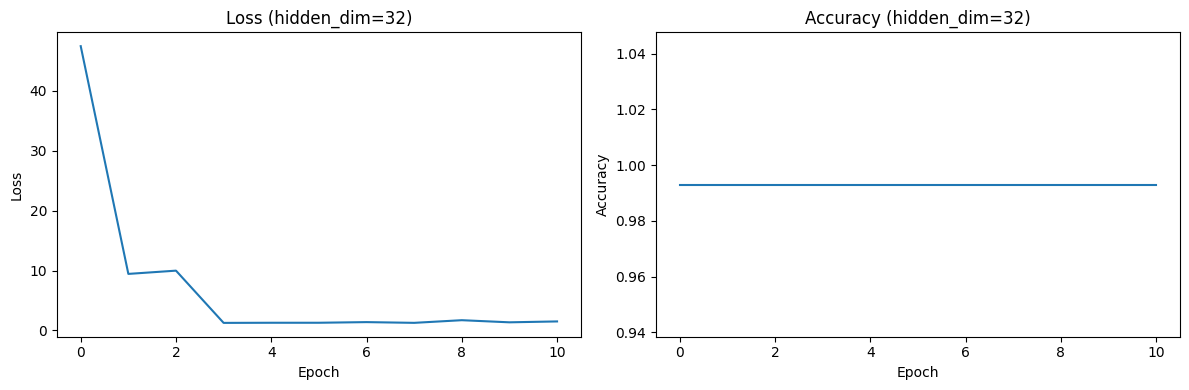


🔎 Training GCN with hidden_dim = 64
Epoch: 010, Loss: 1.6843, Accuracy: 0.9930
Early stopping at epoch 11
Best Accuracy for hidden_dim=64: 0.9930


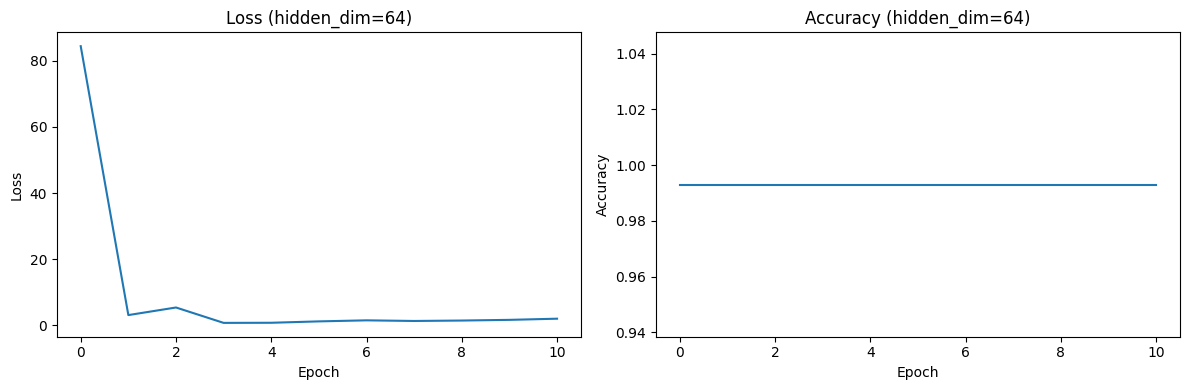


🔬 Grid Search Results:
Hidden Dim 16: Accuracy 0.9930
Hidden Dim 32: Accuracy 0.9930
Hidden Dim 64: Accuracy 0.9930

🎉 Best hidden dimension: 16 with accuracy 0.9930


In [ ]:
!pip install torch torchvision torchaudio
!pip install torch-geometric
!pip install matplotlib networkx pandas

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np


hiv_proteins_set = {'vpr', 'nef', 'gag-pol','gag','vpu','env','vif','asp','rev','tat'}

nodes = df_centrality["Node"].values
node_to_idx = {node: idx for idx, node in enumerate(nodes)}

features = df_centrality.drop(columns=["Node"]).values
features = torch.tensor(features, dtype=torch.float)

labels = []
for node in df_centrality["Node"]:
    if node.lower() in hiv_proteins_set:
        labels.append(1)  # HIV protein
    else:
        labels.append(0)  # Human protein
labels = torch.tensor(labels, dtype=torch.long)

edges = []
for u, v in graph.edges():
    edges.append([node_to_idx[u], node_to_idx[v]])

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

data = Data(x=features, edge_index=edge_index, y=labels)
print("Graph Data Object:")
print(data)

class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

def train(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

def evaluate(model, data):
    model.eval()
    with torch.no_grad():
        logits = model(data)
        pred = logits.argmax(dim=1)
        acc = (pred == data.y).sum().item() / data.y.size(0)
    return acc

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nUsing device: {device}")

data = data.to(device)

hidden_dims = [16, 32, 64]
results = {}

for hidden_dim in hidden_dims:
    print(f"\n🔎 Training GCN with hidden_dim = {hidden_dim}")

    model = GCN(input_dim=features.shape[1], hidden_dim=hidden_dim, output_dim=2).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
    criterion = nn.CrossEntropyLoss()

    best_val_acc = 0
    patience_counter = 0
    PATIENCE = 10

    train_losses = []
    train_accs = []

    for epoch in range(1, 201):
        loss = train(model, data, optimizer, criterion)
        acc = evaluate(model, data)

        train_losses.append(loss)
        train_accs.append(acc)

        if acc > best_val_acc:
            best_val_acc = acc
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= PATIENCE:
            print(f"Early stopping at epoch {epoch}")
            break

        if epoch % 10 == 0:
            print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

    results[hidden_dim] = best_val_acc
    print(f"Best Accuracy for hidden_dim={hidden_dim}: {best_val_acc:.4f}")

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.title(f'Loss (hidden_dim={hidden_dim})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Training Accuracy')
    plt.title(f'Accuracy (hidden_dim={hidden_dim})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

print("\n🔬 Grid Search Results:")
for hdim, acc in results.items():
    print(f"Hidden Dim {hdim}: Accuracy {acc:.4f}")

best_hdim = max(results, key=results.get)
print(f"\n🎉 Best hidden dimension: {best_hdim} with accuracy {results[best_hdim]:.4f}")